<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter4/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm clusterdata.*
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv

Python 3.7.12
--2021-11-05 09:23:20--  https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv [following]
--2021-11-05 09:23:20--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4832 (4.7K) [text/plain]
Saving to: ‘clusterdata.csv’

clusterdata.csv     100%[===================>]   4.72K  --.-KB/s    in 0s      

2021-11-05 09:23:

# Example 4.6
## Import modules

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

Loss = 2.288


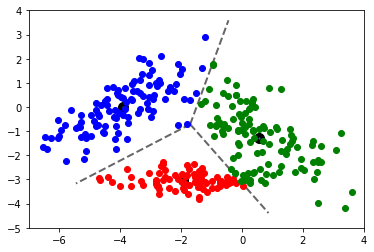

In [4]:
Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
K = 3
n, D = Xmat.shape
c  = np.array([[-2.0,-4,0],[-3,1,-1]])  #initialize centers
cold = np.zeros(c.shape)
dist2 = np.zeros((K,n))
#for h in range(0,100):
while np.abs(c - cold).sum() > 0.001:
   cold = c.copy()
   for i in range(0,K): #compute the squared distances
        dist2[i,:] = np.sum((Xmat - c[:,i].T)**2, 1)
        
   label = np.argmin(dist2,0) #assign the points to nearest centroid
   minvals = np.amin(dist2,0)
   for i in range(0,K): # recompute the centroids
       c[:,i] = np.mean(Xmat[np.where(label == i),:], 1).reshape(1,2)

print('Loss = {:3.3f}'.format(minvals.mean()))



CT = c.T
vor = Voronoi(CT)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black',
                line_width=2, line_alpha=0.6, point_size=2)

for i in range(300):
    if label[i] == 0 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'ro')
    if label[i] == 1 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'bo')
    if label[i] == 2 :
        plt.plot(Xmat[i,0], Xmat[i,1], 'go')

for i in range(3):
    plt.scatter(CT[i][0], CT[i][1], c='black', s=100)

plt.xlim([-7, 4])
plt.ylim([-5, 4])
plt.show()
